# **Workshop: From electrons to phase diagrams**

# Day 2: Validation of the potentials (draft)

## Import the fitted potentials for Li-Al ( from prevoius excercise)

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import time
from helper import potentials_list, get_clean_project_name

In [2]:
time_start =  time.process_time()
time_start

3.5625

In [3]:
from pyiron_atomistics import Project
import pyiron_gpl
# from ase.lattice.compounds import B2
# from pyiron_atomistics import ase_to_pyiron

In [4]:
# from structdbrest import StructDBLightRester
# rest = StructDBLightRester(token="workshop2021")

In [5]:
pr = Project("validation_LiAl")
pr.remove_jobs(silently=True, recursive=True)

  0%|          | 0/148 [00:00<?, ?it/s]

In [6]:
potentials_list[0]

,Name,Filename,Model,Species,Config
0,LiAl_eam,[/home/surendralal/notebooks/workshop_preparation/potentials/AlLi.eam.fs],EAM,"[Li, Al]","[pair_style eam/fs\n, pair_coeff * * AlLi.eam.fs Li Al\n]"


## Iterate over all potentials and all possible phases

In [7]:
struct_dict = dict()
struct_dict["Al"] = dict()
struct_dict["Al"]["s_murn"] = ["fcc", "bcc"]
struct_dict["Al"]["a"] = 4.04

struct_dict["Li"] = dict()
struct_dict["Li"]["s_murn"] = ["fcc", "bcc"]
struct_dict["Li"]["a"] = 3.5


struct_dict["LiAl"] = dict()
struct_dict["LiAl"]["s_murn"] = ["B2"]
struct_dict["LiAl"]["a"] = 3.7

struct_dict

{'Al': {'s_murn': ['fcc', 'bcc'], 'a': 4.04},
 'Li': {'s_murn': ['fcc', 'bcc'], 'a': 3.5},
 'LiAl': {'s_murn': ['B2'], 'a': 3.7}}

### Ground state: E-V curves

In [8]:
for pot in potentials_list:
    with pr.open(get_clean_project_name(pot)) as pr_pot:
        for compound, compound_dict in struct_dict.items():
            for crys_structure in compound_dict["s_murn"]:
                
                # Relax structure
                if crys_structure == "B2":
                    basis = pr.create.structure.compound.B2("Li", "Al", a=compound_dict["a"])
                else:
                    basis = pr_pot.create_ase_bulk(compound, crys_structure, a=compound_dict["a"])
                job_relax = pr_pot.create_job(pr_pot.job_type.Lammps, f"{compound}_{crys_structure}_relax", delete_existing_job=True)

                job_relax.structure = basis
                job_relax.potential = pot
                job_relax.calc_minimize(pressure=0)
                job_relax.run()
                
                # Murnaghan
                job_ref = pr_pot.create_job(pr_pot.job_type.Lammps, f"ref_job_{compound}_{crys_structure}")
                job_ref.structure = job_relax.get_structure(-1)
                job_ref.potential = pot
                job_ref.calc_minimize()
                murn_job = job_ref.create_job(pr_pot.job_type.Murnaghan, f"murn_job_{compound}_{crys_structure}")
                murn_job.input["vol_range"] = 0.1
                murn_job.run()

The job Al_fcc_relax was saved and received the ID: 616
The job murn_job_Al_fcc was saved and received the ID: 617
The job murn_job_Al_fcc_0_9 was saved and received the ID: 618
The job murn_job_Al_fcc_0_92 was saved and received the ID: 619
The job murn_job_Al_fcc_0_94 was saved and received the ID: 620
The job murn_job_Al_fcc_0_96 was saved and received the ID: 621
The job murn_job_Al_fcc_0_98 was saved and received the ID: 622
The job murn_job_Al_fcc_1_0 was saved and received the ID: 623
The job murn_job_Al_fcc_1_02 was saved and received the ID: 624
The job murn_job_Al_fcc_1_04 was saved and received the ID: 625
The job murn_job_Al_fcc_1_06 was saved and received the ID: 626
The job murn_job_Al_fcc_1_08 was saved and received the ID: 627
The job murn_job_Al_fcc_1_1 was saved and received the ID: 628
The job Al_bcc_relax was saved and received the ID: 629
The job murn_job_Al_bcc was saved and received the ID: 630
The job murn_job_Al_bcc_0_9 was saved and received the ID: 631
The jo

In [9]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,616,finished,Al,Al_fcc_relax,/Al_fcc_relax,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/,2022-05-04 22:49:05.133150,2022-05-04 22:49:05.498424,0.0,pyiron@cmdell17#1,Lammps,0.1,None,NaN
1,617,finished,Al,murn_job_Al_fcc,/murn_job_Al_fcc,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/,2022-05-04 22:49:06.215829,2022-05-04 22:49:22.913078,16.0,pyiron@cmdell17#1#11/11,Murnaghan,0.3.0,None,NaN
2,618,finished,Al,murn_job_Al_fcc_0_9,/murn_job_Al_fcc_0_9,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/murn_job_Al_fcc_hdf5/,2022-05-04 22:49:06.940592,2022-05-04 22:49:07.319269,0.0,pyiron@cmdell17#1,Lammps,0.1,None,617.0
3,619,finished,Al,murn_job_Al_fcc_0_92,/murn_job_Al_fcc_0_92,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/murn_job_Al_fcc_hdf5/,2022-05-04 22:49:08.269957,2022-05-04 22:49:08.637426,0.0,pyiron@cmdell17#1,Lammps,0.1,None,617.0
4,620,finished,Al,murn_job_Al_fcc_0_94,/murn_job_Al_fcc_0_94,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/murn_job_Al_fcc_hdf5/,2022-05-04 22:49:09.584156,2022-05-04 22:49:09.974398,0.0,pyiron@cmdell17#1,Lammps,0.1,None,617.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,676,finished,AlLi,murn_job_LiAl_B2_1_02,/murn_job_LiAl_B2_1_02,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/murn_job_LiAl_B2_hdf5/,2022-05-04 22:50:35.979262,2022-05-04 22:50:36.372339,0.0,pyiron@cmdell17#1,Lammps,0.1,None,669.0
61,677,finished,AlLi,murn_job_LiAl_B2_1_04,/murn_job_LiAl_B2_1_04,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/murn_job_LiAl_B2_hdf5/,2022-05-04 22:50:37.429723,2022-05-04 22:50:37.807216,0.0,pyiron@cmdell17#1,Lammps,0.1,None,669.0
62,678,finished,AlLi,murn_job_LiAl_B2_1_06,/murn_job_LiAl_B2_1_06,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/murn_job_LiAl_B2_hdf5/,2022-05-04 22:50:38.858581,2022-05-04 22:50:39.272040,0.0,pyiron@cmdell17#1,Lammps,0.1,None,669.0
63,679,finished,AlLi,murn_job_LiAl_B2_1_08,/murn_job_LiAl_B2_1_08,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/murn_job_LiAl_B2_hdf5/,2022-05-04 22:50:40.299460,2022-05-04 22:50:40.688724,0.0,pyiron@cmdell17#1,Lammps,0.1,None,669.0


In [10]:
# Define functions to get data

# Only work with Murnaghan jobs
def get_only_murn(job_table):
    return (job_table.hamilton == "Murnaghan") & (job_table.status == "finished") 

def get_eq_vol(job_path):
    return job_path["output/equilibrium_volume"]

def get_eq_lp(job_path):
    return np.linalg.norm(job_path["output/structure/cell/cell"][0]) * np.sqrt(2)

def get_eq_bm(job_path):
    return job_path["output/equilibrium_bulk_modulus"]

def get_potential(job_path):
    return job_path.project.path.split("/")[-3]

def get_eq_energy(job_path):
    return job_path["output/equilibrium_energy"]

def get_n_atoms(job_path):
    return len(job_path["output/structure/positions"])


def get_potential(job_path):
    return job_path.project.path.split("/")[-2]

def get_crystal_structure(job_path):
    return job_path.job_name.split("_")[-1]

def get_compound(job_path):
    return job_path.job_name.split("_")[-2]

In [11]:
# Compile data using pyiron tables
table = pr.create_table("table_murn", delete_existing_job=True)
table.convert_to_object = True
table.db_filter_function = get_only_murn
table.add["potential"] = get_potential
table.add["compound"] = get_compound
table.add["crystal_structure"] = get_crystal_structure
table.add["a"] = get_eq_lp
table.add["eq_vol"] = get_eq_vol
table.add["eq_bm"] = get_eq_bm
table.add["eq_energy"] = get_eq_energy
table.add["n_atoms"] = get_n_atoms
table.run()
data_murn = table.get_dataframe()

The job table_murn was saved and received the ID: 681


Loading and filtering jobs:   0%|          | 0/5 [00:00<?, ?it/s]

Processing jobs:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
pr.job_table(status="finished", hamilton="Murnaghan")

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
1,617,finished,Al,murn_job_Al_fcc,/murn_job_Al_fcc,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/,2022-05-04 22:49:06.215829,2022-05-04 22:49:22.913078,16.0,pyiron@cmdell17#1#11/11,Murnaghan,0.3.0,None,NaN
14,630,finished,Al,murn_job_Al_bcc,/murn_job_Al_bcc,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/,2022-05-04 22:49:24.807002,2022-05-04 22:49:41.327694,16.0,pyiron@cmdell17#1#11/11,Murnaghan,0.3.0,None,NaN
27,643,finished,Li,murn_job_Li_fcc,/murn_job_Li_fcc,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/,2022-05-04 22:49:43.066799,2022-05-04 22:50:04.332253,21.0,pyiron@cmdell17#1#11/11,Murnaghan,0.3.0,None,NaN
40,656,finished,Li,murn_job_Li_bcc,/murn_job_Li_bcc,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/,2022-05-04 22:50:06.470703,2022-05-04 22:50:24.470539,17.0,pyiron@cmdell17#1#11/11,Murnaghan,0.3.0,None,NaN
53,669,finished,AlLi,murn_job_LiAl_B2,/murn_job_LiAl_B2,None,/home/surendralal/notebooks/workshop_preparation/validation/validation_LiAl/LiAl_eam/,2022-05-04 22:50:26.442419,2022-05-04 22:50:42.830226,16.0,pyiron@cmdell17#1#11/11,Murnaghan,0.3.0,None,NaN


In [13]:
data_murn

,job_id,potential,compound,crystal_structure,a,eq_vol,eq_bm,eq_energy,n_atoms
0,617,LiAl_eam,Al,fcc,4.039967,16.495612,85.876912,-3.483097,1
1,630,LiAl_eam,Al,bcc,3.898853,16.147864,48.620841,-3.415312,1
2,643,LiAl_eam,Li,fcc,4.253841,19.241330,13.985972,-1.758107,1
3,656,LiAl_eam,Li,bcc,4.195477,20.114514,13.690609,-1.757011,1
4,669,LiAl_eam,LiAl,B2,4.341228,28.939499,71.555056,-5.300981,2


In [27]:
4.195477 / np.sqrt(2)

2.966650237012193

## Elastic constants and Phonons

In [14]:
for pot in potentials_list:
    group_name = get_clean_project_name(pot)
    pr_pot = pr.create_group(group_name)
    print(group_name)
    
    for _, row in data_murn[data_murn.potential==group_name].iterrows():
        job_id = row.job_id
        
        job_ref = pr_pot.create_job(pr_pot.job_type.Lammps, f"ref_job_{row.compound}_{row.crystal_structure}")
        ref = pr_pot.load(job_id)
        job_ref.structure = ref.structure
        job_ref.potential = pot
        job_ref.calc_minimize()
        elastic_job = job_ref.create_job(pr_pot.job_type.ElasticMatrixJob, f"elastic_job_{row.compound}_{row.crystal_structure}")
        elastic_job.input["eps_range"] = 0.05
        elastic_job.run()
        
        
        phonopy_job = job_ref.create_job(pr_pot.job_type.PhonopyJob, f"phonopy_job_{row.compound}_{row.crystal_structure}")
        job_ref.calc_static()
        phonopy_job.run()

LiAl_eam
The job elastic_job_Al_fcc was saved and received the ID: 682
The job s_e_0 was saved and received the ID: 683
The job s_01_e_m0_05000 was saved and received the ID: 684
The job s_01_e_m0_02500 was saved and received the ID: 685
The job s_01_e_0_02500 was saved and received the ID: 686
The job s_01_e_0_05000 was saved and received the ID: 687
The job s_08_e_m0_05000 was saved and received the ID: 688
The job s_08_e_m0_02500 was saved and received the ID: 689
The job s_08_e_0_02500 was saved and received the ID: 690
The job s_08_e_0_05000 was saved and received the ID: 691
The job s_23_e_m0_05000 was saved and received the ID: 692
The job s_23_e_m0_02500 was saved and received the ID: 693
The job s_23_e_0_02500 was saved and received the ID: 694
The job s_23_e_0_05000 was saved and received the ID: 695
The job phonopy_job_Al_fcc was saved and received the ID: 696
The job ref_job_Al_fcc_0 was saved and received the ID: 697
The job elastic_job_Al_bcc was saved and received the ID

In [15]:
def filter_elastic(job_table):
    return (job_table.hamilton == "ElasticMatrixJob") & (job_table.status == "finished")

# Get corresponding lattice constants
def get_c11(job_path):
    return job_path["output/elasticmatrix"]["C"][0, 0]

def get_c12(job_path):
    return job_path["output/elasticmatrix"]["C"][0, 1]

def get_c44(job_path):
    return job_path["output/elasticmatrix"]["C"][3, 3]

In [16]:
table = pr.create_table("table_elastic", delete_existing_job=True)
table.db_filter_function = filter_elastic
table.add["potential"] = get_potential
table.add["C11"] = get_c11
table.add["C12"] = get_c12
table.add["C44"] = get_c44
table.add["compound"] = get_compound
table.add["crystal_structure"] = get_crystal_structure

table.run()
data_elastic = table.get_dataframe()
data_elastic

The job table_elastic was saved and received the ID: 763


Loading and filtering jobs:   0%|          | 0/5 [00:00<?, ?it/s]

Processing jobs:   0%|          | 0/5 [00:00<?, ?it/s]

,job_id,potential,C11,C12,C44,compound,crystal_structure
0,682,LiAl_eam,120.339279,66.483631,45.515458,Al,fcc
1,698,LiAl_eam,19.483136,80.122147,56.596288,Al,bcc
2,714,LiAl_eam,17.071189,12.323044,12.893122,Li,fcc
3,730,LiAl_eam,16.740018,11.018163,12.688217,Li,bcc
4,746,LiAl_eam,67.699915,68.635697,53.480973,LiAl,B2


### Visualization of the results

In [17]:
data_murn

,job_id,potential,compound,crystal_structure,a,eq_vol,eq_bm,eq_energy,n_atoms
0,617,LiAl_eam,Al,fcc,4.039967,16.495612,85.876912,-3.483097,1
1,630,LiAl_eam,Al,bcc,3.898853,16.147864,48.620841,-3.415312,1
2,643,LiAl_eam,Li,fcc,4.253841,19.241330,13.985972,-1.758107,1
3,656,LiAl_eam,Li,bcc,4.195477,20.114514,13.690609,-1.757011,1
4,669,LiAl_eam,LiAl,B2,4.341228,28.939499,71.555056,-5.300981,2


In [18]:
data_elastic

,job_id,potential,C11,C12,C44,compound,crystal_structure
0,682,LiAl_eam,120.339279,66.483631,45.515458,Al,fcc
1,698,LiAl_eam,19.483136,80.122147,56.596288,Al,bcc
2,714,LiAl_eam,17.071189,12.323044,12.893122,Li,fcc
3,730,LiAl_eam,16.740018,11.018163,12.688217,Li,bcc
4,746,LiAl_eam,67.699915,68.635697,53.480973,LiAl,B2


In [19]:
df_ground_state = pd.merge(on=["potential", "compound", "crystal_structure"], left=data_murn, right=data_elastic, suffixes=('_murn', '_elastic'))
df_ground_state["phase"] = df_ground_state.compound + "_" + df_ground_state.crystal_structure
df_ground_state

,job_id_murn,potential,compound,crystal_structure,a,eq_vol,eq_bm,eq_energy,n_atoms,job_id_elastic,C11,C12,C44,phase
0,617,LiAl_eam,Al,fcc,4.039967,16.495612,85.876912,-3.483097,1,682,120.339279,66.483631,45.515458,Al_fcc
1,630,LiAl_eam,Al,bcc,3.898853,16.147864,48.620841,-3.415312,1,698,19.483136,80.122147,56.596288,Al_bcc
2,643,LiAl_eam,Li,fcc,4.253841,19.241330,13.985972,-1.758107,1,714,17.071189,12.323044,12.893122,Li_fcc
3,656,LiAl_eam,Li,bcc,4.195477,20.114514,13.690609,-1.757011,1,730,16.740018,11.018163,12.688217,Li_bcc
4,669,LiAl_eam,LiAl,B2,4.341228,28.939499,71.555056,-5.300981,2,746,67.699915,68.635697,53.480973,LiAl_B2


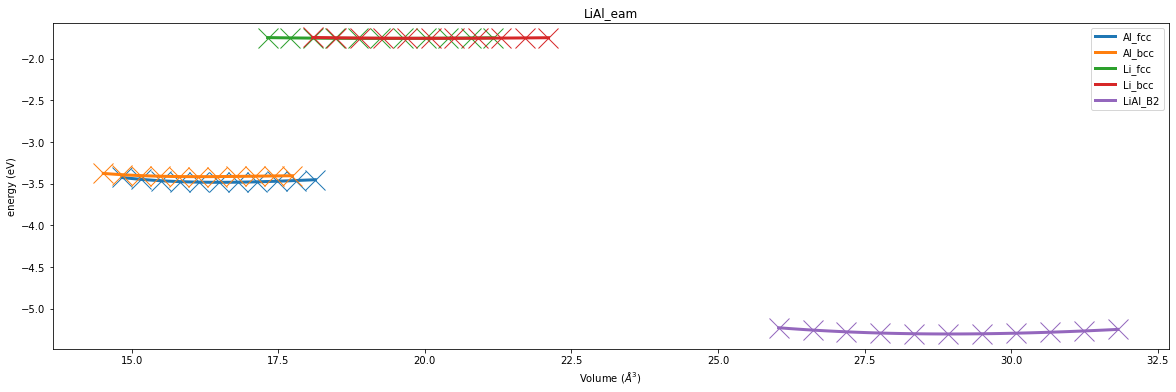

In [20]:
fig, ax_list = plt.subplots(ncols=len(potentials_list), nrows=1, sharex="row", sharey="row")

fig.set_figwidth(20)
fig.set_figheight(6)

color_palette = sns.color_palette("tab10", n_colors=len(df_ground_state.phase.unique()))


for i, pot in enumerate(potentials_list):
    
    if len(potentials_list) == 1:
        ax = ax_list
    else:
        ax = ax_list[i]
    data = df_ground_state[df_ground_state.potential == get_clean_project_name(pot)]
    
    for j, (_, row) in enumerate(data.iterrows()):
        
        ax = pr.load(row.job_id_murn).plot(plt_show=False, ax=ax, plot_kwargs={"label": row.phase, "color": color_palette[j]})
    
    ax.set_title(f"{get_clean_project_name(pot)}")
    #break
fig.subplots_adjust(wspace=0.1);

In [21]:
# fig, ax_list = plt.subplots(ncols=len(potential_list), nrows=1, sharex="row", sharey="row")

# fig.set_figwidth(20)
# fig.set_figheight(6)

# color_palette = sns.color_palette("tab10", n_colors=len(df_ground_state.phase.unique()))


# for i, pot in enumerate(potential_list):
    
#     ax = ax_list[i]
#     data = df_ground_state[df_ground_state.potential == clean_project_name(pot)]
    
#     for j, (_, row) in enumerate(data.iterrows()):
        
#         ax = pr.load(row.job_id_murn).plot(plt_show=False, ax=ax, plot_kwargs={"label": f"phase_{j}", "color": color_palette[j]})
    
#     ax.set_title(f"Potential {i}")
#     #break
# fig.subplots_adjust(wspace=0.1);
# plt.savefig("example.jpeg", bbox_inches="tight");

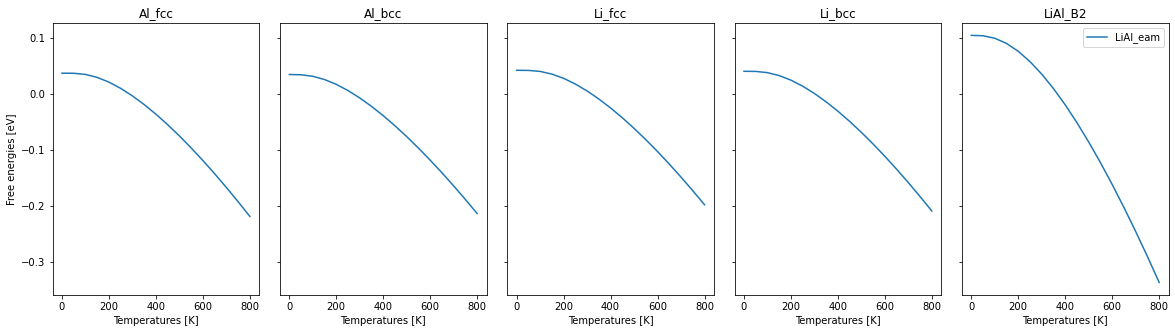

In [22]:
fig, ax_list = plt.subplots(ncols=len(df_ground_state.phase.unique()), nrows=1, sharex="row", sharey="row")

fig.set_figwidth(20)
fig.set_figheight(5)

color_palette = sns.color_palette("tab10", n_colors=len(df_ground_state.potential.unique()))


for i, phase in enumerate(df_ground_state.phase.unique()):
    
    ax = ax_list[i]
    data = df_ground_state[df_ground_state.phase == phase]
    
    
    
    for j, pot in enumerate(potentials_list):
        
        phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
    
        thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)

        ax.plot(thermo.temperatures, thermo.free_energies, label=get_clean_project_name(pot), color=color_palette[j])
        ax.set_xlabel("Temperatures [K]")
    ax.set_title(f"{phase}")
ax_list[0].set_ylabel("Free energies [eV]")

ax_list[-1].legend()
fig.subplots_adjust(wspace=0.1);

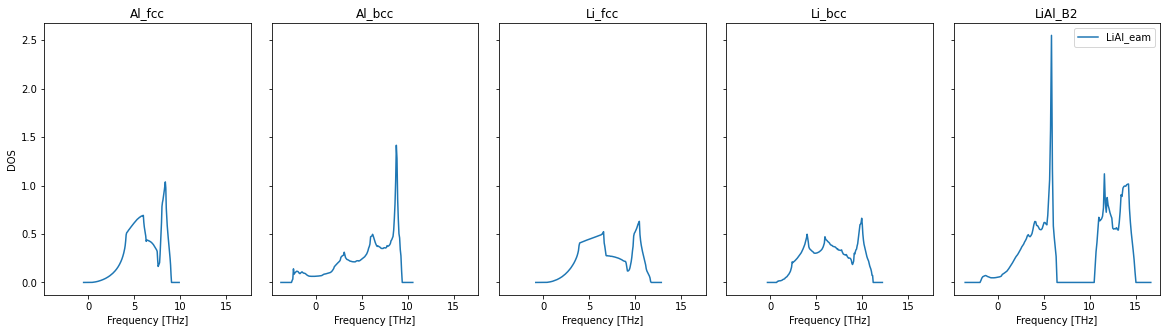

In [23]:
fig, ax_list = plt.subplots(ncols=len(df_ground_state.phase.unique()), nrows=1, sharex="row", sharey="row")

fig.set_figwidth(20)
fig.set_figheight(5)

color_palette = sns.color_palette("tab10", n_colors=len(df_ground_state.potential.unique()))


for i, phase in enumerate(df_ground_state.phase.unique()):
    
    ax = ax_list[i]
    data = df_ground_state[df_ground_state.phase == phase]
    
    
    
    for j, pot in enumerate(potentials_list):
        
        phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
    
        thermo = phonopy_job.get_thermal_properties(t_min=0, t_max=800)
        
        ax.plot(phonopy_job["output/dos_energies"], phonopy_job["output/dos_total"], color=color_palette[j], label=get_clean_project_name(pot))
        ax.set_xlabel("Frequency [THz]")
    ax.set_title(f"{phase}")
ax_list[0].set_ylabel("DOS")

ax_list[-1].legend()
fig.subplots_adjust(wspace=0.1);

In [24]:
# phonopy_job.plot_band_structure()

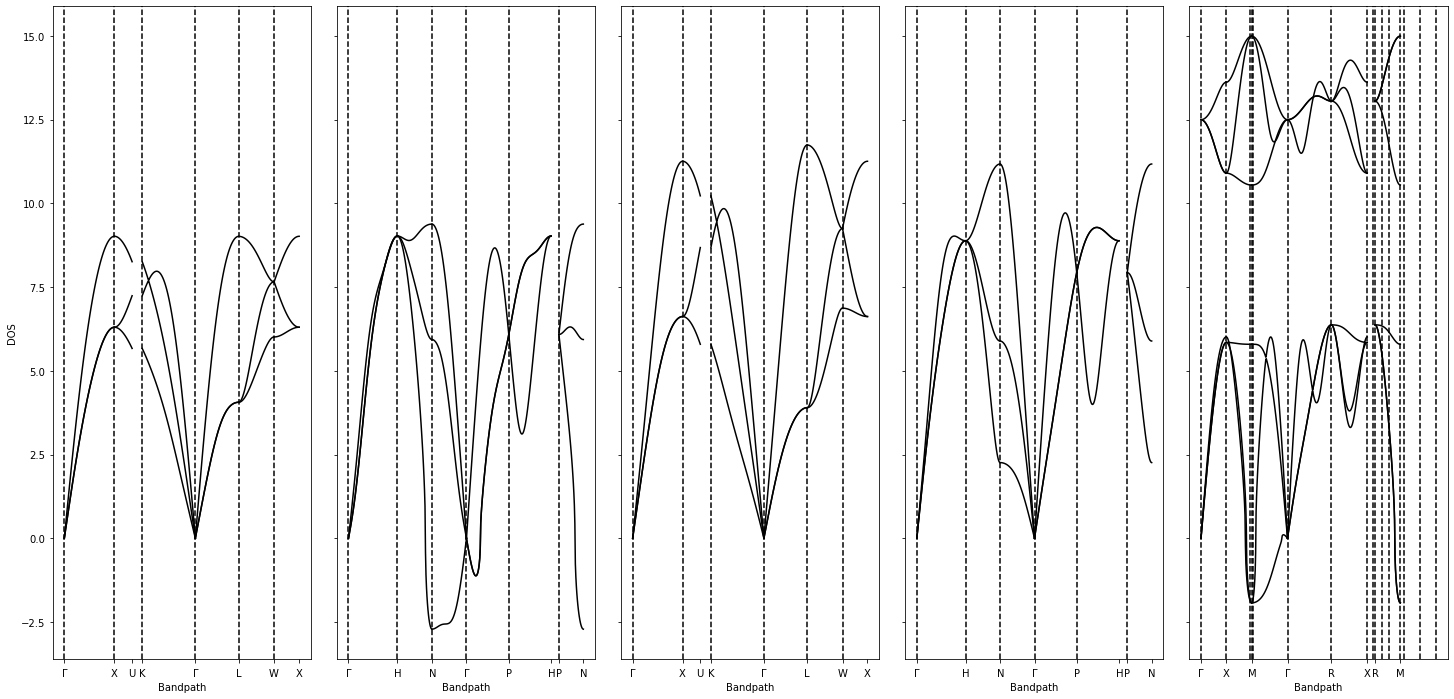

In [25]:
fig, ax_list = plt.subplots(ncols=len(df_ground_state.phase.unique()), nrows=len(potentials_list), sharey="row")

fig.set_figwidth(25)
fig.set_figheight(12)

color_palette = sns.color_palette("tab10", n_colors=len(df_ground_state.potential.unique()))


for i, phase in enumerate(df_ground_state.phase.unique()):
    
    
    data = df_ground_state[df_ground_state.phase == phase]
    
    
    
    for j, pot in enumerate(potentials_list):
        
        if len(potentials_list) == 1:
            ax = ax_list[i]
            ax_list[0].set_ylabel("DOS")
            ax.set_title(f"{phase}")
            
        else:
            ax = ax_list[j][i]
            ax_list[j][0].set_ylabel("DOS")
            ax_list[0][i].set_title(f"{phase}")
        phonopy_job = pr[get_clean_project_name(pot) + f"/phonopy_job_{phase}"]
    
        phonopy_job.plot_band_structure(axis=ax)
        ax.set_ylabel("")
        ax.set_title("")
        
fig.subplots_adjust(wspace=0.1, hspace=0.4);

In [26]:
time_stop = time.process_time()
print(f"Total run time for the notebook {time_stop - time_start} seconds")

Total run time for the notebook 355.40625 seconds


Todo:

    - SQS and intermediate ordered phases, layered phases (supply the structures)
    - Properties of compounds
    - Split the workflows into several notebooks
    - Defect formation energies etc.
    - Link to Sarath's part?? (Thermal expansion using MD/QHA)
    - Showing that MD works with these potentials